<a href="https://colab.research.google.com/github/dominikjagoda/my-first/blob/main/DeepLearningZad1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import random
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import plot_roc_curve, auc, roc_curve, roc_auc_score


In [38]:
def circle():
    x1=random.random()
    x2=random.random()
    if((x1-0.5)*(x1-0.5)+(x2-0.5)*(x2-0.5) < 0.4*0.4):
      return np.array([x1,x2,1])
    else:
      return np.array([x1,x2,0])


In [39]:

sample=np.array([circle() for i in range(6000)])
print(probka_k.shape)

(6000, 3)


In [40]:
def draw_result(X,y):
  fig=plt.figure(figsize=(5,5))
  # dorysowanie okręgu
  #ax=fig.add_subplot(1,1,1)
  #circ=plt.Circle((0.5,0.5), radius=.4, color='black', fill=False)
  #ax.add_patch(circ)

  plt.title("Działanie na próbce testowej",fontsize=14)
  plt.xlim(min(X[:,0]),max(X[:,0]))
  plt.ylim(min(X[:,1]),max(X[:,1]))
  plt.scatter(X[:,0],X[:,1],c=y)
  plt.xlabel('$x_1$',fontsize=18)
  plt.ylabel('$x_2$',fontsize=18);

Shapes of datasets X_train (4200, 2), X_test (1800, 2), y_train (4200,), y_test (1800,): 


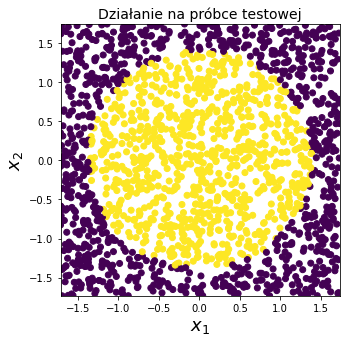

In [41]:
X,y = sample[:,:2],sample[:,2]

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print("Shapes of datasets X_train {}, X_test {}, y_train {}, y_test {}: ".format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))

draw_result(X_test,y_test)

In [42]:
clf = MLPClassifier(hidden_layer_sizes=(5,5), activation='tanh', alpha=0.1, 
                    learning_rate_init=0.01, early_stopping=True,validation_fraction=0.2,verbose=True,n_iter_no_change=100,max_iter=1000)

print(clf.fit(X_train,y_train))
score = clf.score(X_test,y_test)
print('score = {}'.format(score)) 
Z = clf.predict_proba(X_test)[:,1] # returns probability 
print(Z)


Iteration 1, loss = 0.78760363
Validation score: 0.522619
Iteration 2, loss = 0.70891482
Validation score: 0.573810
Iteration 3, loss = 0.68282785
Validation score: 0.648810
Iteration 4, loss = 0.65431529
Validation score: 0.665476
Iteration 5, loss = 0.61212064
Validation score: 0.776190
Iteration 6, loss = 0.54915387
Validation score: 0.803571
Iteration 7, loss = 0.46356261
Validation score: 0.900000
Iteration 8, loss = 0.37732104
Validation score: 0.933333
Iteration 9, loss = 0.30789076
Validation score: 0.940476
Iteration 10, loss = 0.26284391
Validation score: 0.938095
Iteration 11, loss = 0.23041973
Validation score: 0.959524
Iteration 12, loss = 0.20853456
Validation score: 0.945238
Iteration 13, loss = 0.19091811
Validation score: 0.951190
Iteration 14, loss = 0.17836889
Validation score: 0.951190
Iteration 15, loss = 0.16838808
Validation score: 0.960714
Iteration 16, loss = 0.15980089
Validation score: 0.959524
Iteration 17, loss = 0.15158384
Validation score: 0.963095
Iterat

[0.5226190476190476, 0.5738095238095238, 0.6488095238095238, 0.6654761904761904, 0.7761904761904762, 0.8035714285714286, 0.9, 0.9333333333333333, 0.9404761904761905, 0.9380952380952381, 0.9595238095238096, 0.9452380952380952, 0.9511904761904761, 0.9511904761904761, 0.9607142857142857, 0.9595238095238096, 0.9630952380952381, 0.9630952380952381, 0.9535714285714286, 0.9583333333333334, 0.9666666666666667, 0.975, 0.9678571428571429, 0.9714285714285714, 0.9726190476190476, 0.9726190476190476, 0.969047619047619, 0.9678571428571429, 0.9809523809523809, 0.9833333333333333, 0.9785714285714285, 0.9702380952380952, 0.9654761904761905, 0.9809523809523809, 0.9821428571428571, 0.9833333333333333, 0.9809523809523809, 0.9761904761904762, 0.9726190476190476, 0.9761904761904762, 0.9809523809523809, 0.9773809523809524, 0.9845238095238096, 0.9797619047619047, 0.9761904761904762, 0.9833333333333333, 0.9904761904761905, 0.9785714285714285, 0.9880952380952381, 0.9857142857142858, 0.9785714285714285, 0.979761

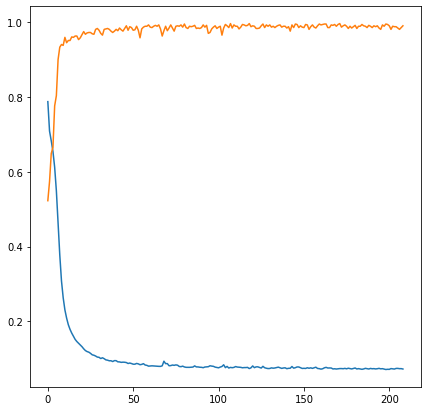

In [43]:
fig=plt.figure(figsize=(7,7))

plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True
print(clf.validation_scores_)
plt.plot(np.asarray(clf.validation_scores_))

plt.show()

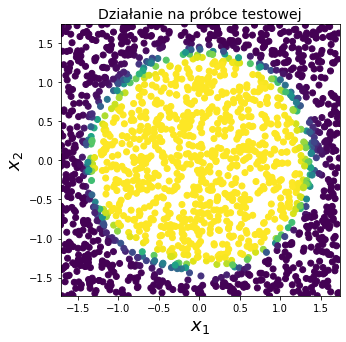

In [44]:
draw_result(X_test, Z)

<Figure size 504x504 with 0 Axes>

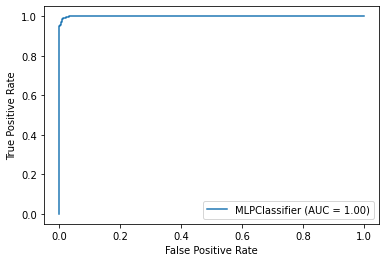

Area Under Curve AUC =  0.9994999252974828
Area Under Curve AUC =  0.9994999252974828


In [45]:


fig=plt.figure(figsize=(7,7))

roc_disp = plot_roc_curve(clf, X_test, y_test)

plt.show()

#Print AUC
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
print("Area Under Curve AUC = ",roc_auc)

#simpler method
print("Area Under Curve AUC = ",roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))